# 🧩 Dataset 5: *House Prices*

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Reading

In [72]:
housing_dataset = pd.read_csv('../data/housing.csv')
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [73]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [74]:
housing_dataset.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [75]:
categorical_cols = [col for col in housing_dataset.columns if housing_dataset[col].dtype == 'object']
numerical_cols = [col for col in housing_dataset.columns if housing_dataset[col].dtype == 'int64']
len(categorical_cols), len(numerical_cols)

(7, 6)

## correlation with price

In [76]:
corr_matrix = housing_dataset.corr(numeric_only=True)
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [77]:
corr_values_with_price = corr_matrix.loc['price', :]
corr_values_with_price

price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

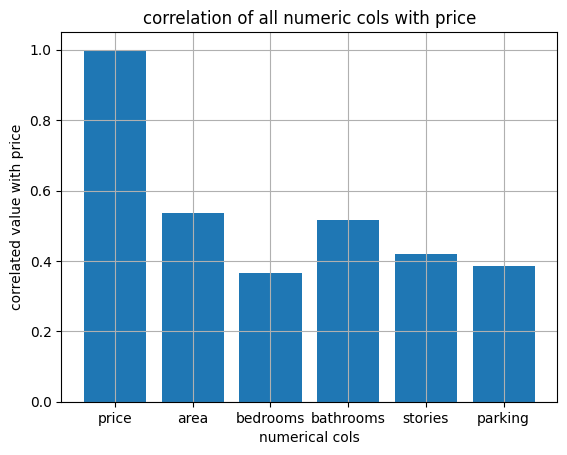

In [78]:
plt.bar(corr_values_with_price.index, corr_values_with_price)
plt.xlabel('numerical cols')
plt.ylabel('correlated value with price')
plt.title('correlation of all numeric cols with price')
plt.grid(True)
plt.show()

<Axes: xlabel='area', ylabel='price'>

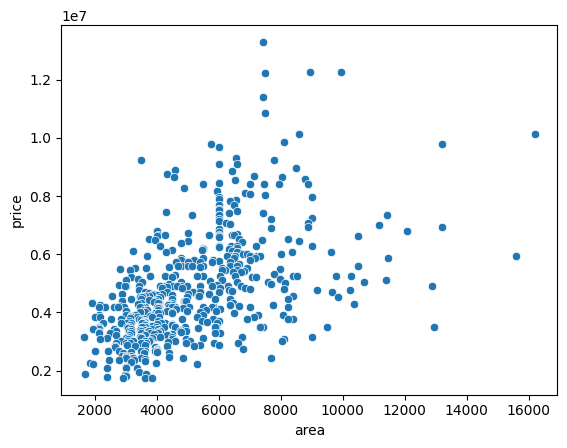

In [79]:
sns.scatterplot(housing_dataset, x='area', y='price')

## Feature Transformation 

In [80]:
# mean of all features
housing_dataset.describe().loc['mean', :].round(2)

price        4766729.25
area            5150.54
bedrooms           2.97
bathrooms          1.29
stories            1.81
parking            0.69
Name: mean, dtype: float64

### Logarithmic Transformation

In [81]:
# we consider are is highly inflated for that to balance the data
housing_dataset_log = housing_dataset.copy()
housing_dataset_log['area']=np.log10(housing_dataset_log['area'])

In [82]:
housing_dataset_log.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,3.870404,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,3.952308,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,3.998259,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,3.875061,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,3.870404,4,1,2,yes,yes,yes,no,yes,2,no,furnished


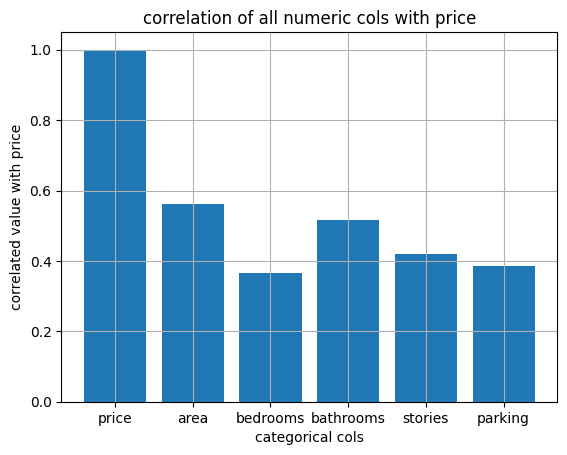

In [83]:
corr_matrix = housing_dataset_log.corr(numeric_only=True)
corr_values_with_price = corr_matrix.loc['price', :]
plt.bar(corr_values_with_price.index, corr_values_with_price)
plt.xlabel('categorical cols')
plt.ylabel('correlated value with price')
plt.title('correlation of all numeric cols with price')
plt.grid(True)
plt.show()

### Normalization(Min Max Transformation)
Formula: x` = (x-xmin)/(xmax-xmin)

In [84]:
housing_dataset_min_max = housing_dataset.copy()
min_area = housing_dataset['area'].min()
max_area = housing_dataset['area'].max()
housing_dataset_min_max['area'] = housing_dataset['area'].apply(lambda x: (x-min_area)/(max_area-min_area))
housing_dataset_min_max.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,0.502405,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,0.571134,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,0.402062,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,0.396564,4,1,2,yes,yes,yes,no,yes,2,no,furnished


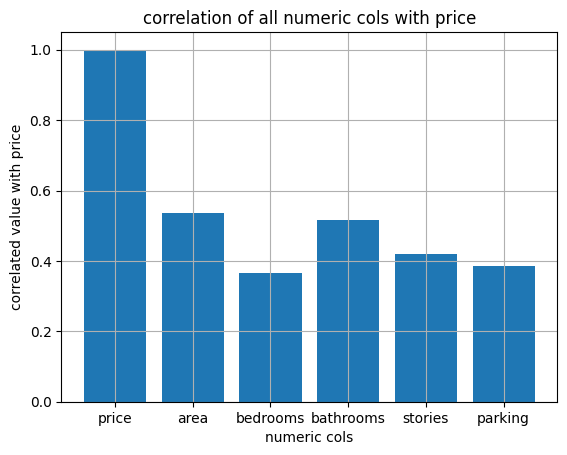

In [85]:
corr_matrix = housing_dataset_min_max.corr(numeric_only=True)
corr_values_with_price = corr_matrix.loc['price', :]
plt.bar(corr_values_with_price.index, corr_values_with_price)
plt.xlabel('numeric cols')
plt.ylabel('correlated value with price')
plt.title('correlation of all numeric cols with price')
plt.grid(True)
plt.show()

### Encoding of categorical columns
we will use housing_dataset_min_max dataset

#### we will use one hot encoding(get dummies) for the cols ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [86]:
encoded_housing_dataset_min_max = pd.get_dummies(housing_dataset_min_max, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], sparse=True, dtype=int)
housing_dataset_min_max.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,0.502405,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,0.571134,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,0.402062,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,0.396564,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### we will use cat encoding for furnishingstatus col

In [87]:
def encoding_furnishing_status(status):
    if status == 'furnished':
        return 1
    elif status == 'semi-furnished':
        return 2
    else:
        return 3
encoded_housing_dataset_min_max['furnishingstatus'] = encoded_housing_dataset_min_max['furnishingstatus'].apply(encoding_furnishing_status)
encoded_housing_dataset_min_max.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,0.396564,4,2,3,2,1,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,0.502405,4,4,4,3,1,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,0.571134,3,2,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,0.402062,4,2,2,3,1,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,0.396564,4,1,2,2,1,0,1,0,1,0,1,1,0,0,1,1,0


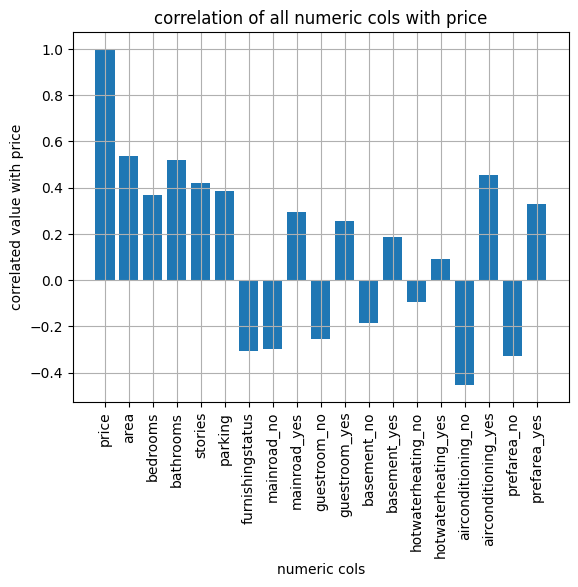

In [90]:
corr_matrix = encoded_housing_dataset_min_max.corr(numeric_only=True)
corr_values_with_price = corr_matrix.loc['price', :]
plt.bar(corr_values_with_price.index, corr_values_with_price)
plt.xlabel('numeric cols')
plt.ylabel('correlated value with price')
plt.title('correlation of all numeric cols with price')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()